In [1]:
#!pip install wget
import sys
sys.path.append('/Users/siddharthjain/miniconda3/lib/python3.7/site-packages')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from subprocess import call
from scipy.stats.distributions import gamma,lognorm
import json 
import wget
import os
import os.path
from datetime import datetime
import pytz 
from collections import OrderedDict
#from google.colab import drive
#os.chdir('/content/gdrive/My Drive')
#drive.mount('/content/gdrive')

In [2]:
#os.chdir('/content/gdrive/My Drive/test')
os.getcwd()

'/Users/siddharthjain/Desktop/backend/testing-and-cfr'

In [3]:
if os.path.exists("test.json"):
    os.remove("test.json")
wget.download('https://api.covid19india.org/v3/data-all.json', "test.json")

'test.json'

In [4]:
def fn(mon):
  if(mon == "01"):
    return " January"
  if(mon == "02"):
    return " February"
  if(mon == "03"):
    return " March"
  if(mon == "04"):
    return " April"
  if(mon == "05"):
    return " May"
  if(mon == "06"):
    return " June"
  if(mon == "07"):
    return " July"
  if(mon == "08"):
    return " August"
  if(mon == "09"):
    return " September"
  if(mon == "10"):
    return " October"
  if(mon == "11"):
    return " November"
  if(mon == "12"):
    return " December"
def convert(dat): 
    return  str(dat[8:10]) + fn(str(dat[5:7]))
def convert1(dat): 
    return  str(dat[:2]) + fn(str(dat[3:5]))

In [5]:
dataset=pd.read_csv('./population.csv')
population=pd.DataFrame()
population["State"]=dataset['State'][:37]
population["Population"]=dataset['Population'][:37]
population=population.set_index('State')

In [6]:
state_id = {
  "TT":"India",
  "MH":"Maharashtra",
  "TN":"Tamil Nadu",
  "DL":"Delhi",
  "GJ":"Gujarat",
  "RJ":"Rajasthan",
  "UP":"Uttar Pradesh",
  "MP":"Madhya Pradesh",
  "WB":"West Bengal",
  "KA":"Karnataka",
  "BR":"Bihar",
  "AP":"Andhra Pradesh",
  "HR":"Haryana",
  "TG":"Telangana",
  "JK":"Jammu and Kashmir",
  "OR":"Odisha",
  "PB":"Punjab",
  "AS":"Assam",
  "KL":"Kerala",
  "UT":"Uttarakhand",
  "JH":"Jharkhand",
  "CT":"Chhattisgarh",
  "TR":"Tripura",
  "HP":"Himachal Pradesh",
  "CH":"Chandigarh",
  "GA":"Goa",
  "MN":"Manipur",
  "NL":"Nagaland",
  "PY":"Puducherry",
  "LA":"Ladakh",
  "AR":"Arunachal Pradesh",
  "AN":"Andaman and Nicobar Islands",
  "ML":"Meghalaya",
  "MZ":"Mizoram",
  "DN":"Dadra and Nagar Haveli and Daman and Diu",
  "SK":"Sikkim",
}

In [7]:
from datetime import timedelta
start=datetime.now()
x1=datetime.now(pytz.timezone('Asia/Kolkata')).date()
#x1 = datetime.today()
#y1 = timedelta(days=7)
y1=[]
x1=str(x1)[:10]
for i in range(7,0,-1):
  y1.append(str(datetime.today()-timedelta(days=i))[:10])
#print(y1)
##y1=str(y1)[:10]
t=y1
t

['2020-07-24',
 '2020-07-25',
 '2020-07-26',
 '2020-07-27',
 '2020-07-28',
 '2020-07-29',
 '2020-07-30']

In [8]:
csv_dates=[]
csv_states=[]
csv_total_cases=[]
csv_cum_recovered=[]
csv_daily_recovered=[]
csv_cum_deceased=[]
csv_daily_deceased=[]
csv_positivity_rate_cumulative=[]
csv_daily_positive_cases=[]
csv_daily_positivity_rate=[]
csv_daily_positive_cases_ma=[]
csv_daily_positivity_rate_ma=[]
csv_test_per_million=[]
csv_daily_tested=[]
csv_cum_tested=[]
for x in t:
  temp = json.load(open('test.json'))[x]
  temp1 = json.load(open('positivity_Rate.json'))
  states={}
  for j in state_id.keys():
    k=state_id[j]
    print(k)
    test_per_million = temp1[k]['test_per_million']
    pos_cum = temp1[k]['cum_positive_cases']
    pos_rate_cum = temp1[k]['cum_positivity_rate']
    daily_pos = temp1[k]['daily_positive_cases']
    daily_pos_ma = temp1[k]['daily_positive_cases_ma']
    daily_pos_rate = temp1[k]['daily_positivity_rate']
    daily_pos_rate_ma = temp1[k]['daily_positivity_rate_ma']
    tested_cum = temp1[k]['cum_tests']
    daily_tested = temp1[k]['daily_tests']
    deceased_cum = temp1[k]['cum_deceased']
    daily_deceased = temp1[k]['daily_deceased']
    recovered_cum = temp1[k]['cum_recovered']
    daily_recovered = temp1[k]['daily_recovered'] 

    dates=temp1[k]['dates']
    if convert(x) not in dates :
      print(1)
      dates.append(convert(x))
      test_per_million.append('')
      pos_cum.append('')
      pos_rate_cum.append('')
      daily_pos.append('')
      daily_pos_ma.append('')
      daily_pos_rate.append('')
      daily_pos_rate_ma.append('')
      tested_cum.append('')
      daily_tested.append('')
      deceased_cum.append('')
      daily_deceased.append('')
      recovered_cum.append('')
      daily_recovered.append('')
      i=len(dates)-1
    for l in range(len(dates)):
      if convert(x)==dates[l]:
        i=l
        break
    

    if k in temp1.keys():
        if 'total' in temp[j].keys():
          if 'confirmed' in temp[j]['total'].keys():
            pos_cum[i]=temp[j]['total']['confirmed']

          if 'tested' in temp[j]['total'].keys():
            tested_cum[i]=abs(temp[j]['total']['tested'])
            test_per_million[i]=temp[j]['total']['tested']*1000000/int(population["Population"][k])
              
          if 'deceased' in temp[j]['total'].keys():
            deceased_cum[i]=temp[j]['total']['deceased']
          
          if 'recovered' in temp[j]['total'].keys():
            recovered_cum[i]=temp[j]['total']['recovered']
          
          if len(str(pos_cum[i])) and len(str(tested_cum[i])):
            pos_rate_cum[i]= pos_cum[i]*100/tested_cum[i]

        if 'delta' in temp[j].keys():
          if 'confirmed' in temp[j]['delta'].keys():
            daily_pos[i]=temp[j]['delta']['confirmed']

          if 'tested' in temp[j]['delta'].keys():
            daily_tested[i]=abs(temp[j]['delta']['tested'])
          
          if 'deceased' in temp[j]['delta'].keys():
            daily_deceased[i]=temp[j]['delta']['deceased']
          
          if 'recovered' in temp[j]['delta'].keys():
            daily_recovered[i]=temp[j]['delta']['recovered']
          
          if len(str(daily_pos[i])) and len(str(daily_tested[i])):
            daily_pos_rate[i]=int(daily_pos[i])*100/int(daily_tested[i])

    for w in range(7,len(daily_pos)):
      sum1=0
      sum2=0
      for s in range(7):
        if (len(str(daily_pos[w-s]))!=0 and len(str(daily_tested[w-s]))!=0):
          sum1+=int(daily_pos[w-s])
          sum2+=int(daily_tested[w-s])
      if (sum2!=0):
        daily_pos_rate_ma[w]=sum1*100/abs(sum2)
    
    for w in range(7,len(daily_pos)):
      sum1=0
      count=0
      for s in range(7):
        if (len(str(daily_pos[w-s]))!=0):
          sum1+=int(daily_pos[w-s])
          count+=1
      if count!=0:
        daily_pos_ma[w]=sum1/count

    st=state_id[j]
    for i in range(len(dates)):
      csv_dates.append(dates[i])
      csv_states.append(st)
      csv_total_cases.append(pos_cum[i])
      csv_positivity_rate_cumulative.append(pos_rate_cum[i])
      csv_daily_positive_cases.append(daily_pos[i])
      csv_cum_recovered.append(recovered_cum[i])
      csv_daily_recovered.append(daily_recovered[i])
      csv_cum_deceased.append(deceased_cum[i])
      csv_daily_deceased.append(daily_deceased[i])
      csv_daily_positivity_rate.append(daily_pos_rate[i])
      csv_daily_positive_cases_ma.append(daily_pos_ma[i])
      csv_daily_positivity_rate_ma.append(daily_pos_rate_ma[i])
      csv_daily_tested.append(daily_tested[i])
      csv_cum_tested.append(tested_cum[i])
      csv_test_per_million.append(test_per_million[i])
    #print(st)
    states[st]={
                    'dates':dates,
                    'cum_positive_cases':pos_cum,
                    'cum_positivity_rate':pos_rate_cum,
                    'daily_positive_cases':daily_pos,
                    'cum_recovered':recovered_cum,
                    'daily_recovered':daily_recovered,
                    'cum_deceased':deceased_cum,
                    'daily_deceased':daily_deceased,
                    'daily_positivity_rate':daily_pos_rate,
                    'daily_positive_cases_ma': daily_pos_ma,
                    'daily_positivity_rate_ma':daily_pos_rate_ma , 
                    'daily_tests': daily_tested,
                    'cum_tests': tested_cum,
                    'test_per_million':test_per_million,    
              }
  states['datetime']=str(datetime.now(pytz.timezone('Asia/Kolkata')))
  with open('positivity_Rate.json', 'w') as outfile:
    json.dump(states, outfile,indent=4)

India
Maharashtra
Tamil Nadu
Delhi
Gujarat
Rajasthan
Uttar Pradesh
Madhya Pradesh
West Bengal
Karnataka
Bihar
Andhra Pradesh
Haryana
Telangana
Jammu and Kashmir
Odisha
Punjab
Assam
Kerala
Uttarakhand
Jharkhand
Chhattisgarh
Tripura
Himachal Pradesh
Chandigarh
Goa
Manipur
Nagaland
Puducherry
Ladakh
Arunachal Pradesh
Andaman and Nicobar Islands
Meghalaya
Mizoram
Dadra and Nagar Haveli and Daman and Diu
Sikkim
India
Maharashtra
Tamil Nadu
Delhi
Gujarat
Rajasthan
Uttar Pradesh
Madhya Pradesh
West Bengal
Karnataka
Bihar
Andhra Pradesh
Haryana
Telangana
Jammu and Kashmir
Odisha
Punjab
Assam
Kerala
Uttarakhand
Jharkhand
Chhattisgarh
Tripura
Himachal Pradesh
Chandigarh
Goa
Manipur
Nagaland
Puducherry
Ladakh
Arunachal Pradesh
Andaman and Nicobar Islands
Meghalaya
Mizoram
Dadra and Nagar Haveli and Daman and Diu
Sikkim
India
Maharashtra
Tamil Nadu
Delhi
Gujarat
Rajasthan
Uttar Pradesh
Madhya Pradesh
West Bengal
Karnataka
Bihar
Andhra Pradesh
Haryana
Telangana
Jammu and Kashmir
Odisha
Punjab
Assam

In [9]:
df=pd.DataFrame()
df['dates']=csv_dates
df['state']=csv_states
df['cum_positive_cases']=csv_total_cases
df['cum_positivity_rate']=csv_positivity_rate_cumulative
df['cum_recovered']=csv_cum_recovered
df['daily_recovered']:csv_daily_recovered
df['cum_deceased']=csv_cum_deceased
df['daily_deceased']:daily_deceased
df['daily_positive_cases']=csv_daily_positive_cases
df['daily_positivity_rate']=csv_daily_positivity_rate
df['daily_positive_cases_ma']=csv_daily_positive_cases_ma
df['daily_positivity_rate_ma']=    csv_daily_positivity_rate_ma
df['daily_tests']=csv_daily_tested
df['cum_tested']=csv_cum_tested
df['test_per_million']=csv_test_per_million
df.to_csv('positivity_Rate.csv',index=False)

## CFR

In [10]:
#dates = np.array([pd.to_datetime(i['date']) for i in filter(lambda v: v['status'] == 'Confirmed',json.load(open('states.json',))['states_daily'])])
#print(dates)
data_recovered = pd.DataFrame()
data_deceased = pd.DataFrame()
data_confirmed = pd.DataFrame()
for s in state_id.keys():
    st=state_id[s]
    data_confirmed[st] = np.array(states[st]['daily_positive_cases'])
    data_deceased[st] = np.array(states[st]['daily_deceased'])
    data_recovered[st] = np.array(states[st]['daily_recovered'])

In [11]:
def n2z(x):
    x[np.logical_or(np.isnan(x),np.isinf(x))] = 0
    return x

In [12]:
data_recovered = data_recovered.replace(r'^\s*$', np.NaN, regex=True).fillna(0)
data_recovered = data_recovered.astype(np.int32)
data_confirmed = data_confirmed.replace(r'^\s*$', np.NaN, regex=True).fillna(0)
data_confirmed = data_confirmed.astype(np.int32)
data_deceased = data_deceased.replace(r'^\s*$', np.NaN, regex=True).fillna(0)
data_deceased = data_deceased.astype(np.int32)
data_deceased['date'] = dates
data_recovered['date'] = dates
data_confirmed['date'] = dates

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: Mean of empty slice
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median for 39 results
  r = func(a, **kwargs)
/Library/Frame

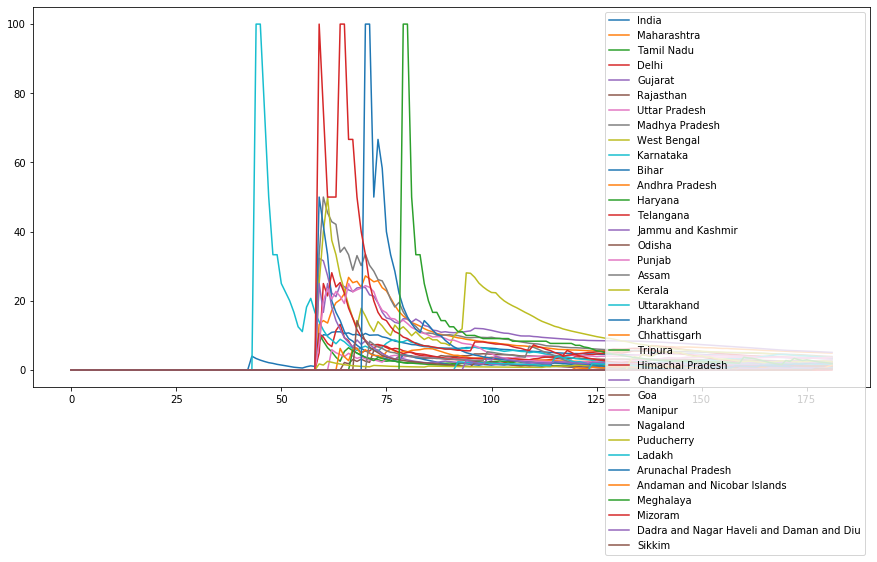

In [13]:
json_data={}
cfr = pd.DataFrame()
final=pd.DataFrame
plt.figure(1, figsize=(15, 7))
for st in state_id.keys():
    state=state_id[st]
    boots = 100
    conf = []
    for n in range(boots):
        #print("Iteration: ",n+1,end='\r')
        dataset = np.copy(data_confirmed[state].values)
        mean = 13.0+(20.9-8.7)/4*np.random.normal()
        sd = 12.7+(26.0-6.4)/4*np.random.normal()
        phi = np.sqrt(sd**2 + mean**2)
        mu = np.log(mean**2/phi)
        sigma = np.sqrt(np.log(phi**2/mean**2))
        L = lognorm(s=sigma,scale=np.exp(mu))
        for i in range(len(dataset)-1,-1,-1):
            send_forward = np.round(L.rvs(np.max([dataset[i],0])))
            send_forward = send_forward[i+send_forward<len(dataset)]
            dataset[i] = 0
            for j in np.unique(np.int32(send_forward)):
                dataset[i+j] += np.sum(send_forward==j)
        conf.append(dataset)
    CFR = np.cumsum(data_deceased[state].values)/np.cumsum(conf,axis=1)
    col_mean = np.nanmean(CFR, axis=0)
    inds = np.where(np.isnan(CFR))
    CFR[inds] = np.take(col_mean, inds[1])
    #temp1=list(pd.Series(dates).dt.strftime('%m-%d-%Y'))
    #print(temp1[0])
    dates = states[state]['dates']
    temp = {
        'dates':dates,
        'cfr1_point':list(n2z(100*np.cumsum(data_deceased[state].values)/np.cumsum(data_confirmed[state].values))),
        'cfr2_point':list(n2z(100*np.cumsum(data_deceased[state].values)/(np.cumsum(data_deceased[state].values)+np.cumsum(data_recovered[state].values)))),
        'cfr3_point':list(n2z(100*np.median(CFR,axis=0))),
        'cfr3_l95':list(n2z(100*np.quantile(CFR,0.025,axis=0))),
        'cfr3_u95':list(n2z(100*np.quantile(CFR,0.975,axis=0))),
        'cfr3_l50':list(n2z(100*np.quantile(CFR,0.25,axis=0))),
        'cfr3_u50':list(n2z(100*np.quantile(CFR,0.75,axis=0))),
        }
    a=state_id[st]
    #print(a)
    json_data[state] = temp
    cfr_state=pd.DataFrame()
    cfr_state['state']=[str(a)]*len(dates)
    cfr_state['dates']=dates
    cfr_state['cfr1_point']=(list(100*n2z(np.cumsum(data_deceased[state].values)/np.cumsum(data_confirmed[state].values))))
    cfr_state['cfr2_point']=(list(100*n2z(np.cumsum(data_deceased[state].values)/(np.cumsum(data_deceased[state].values)+np.cumsum(data_recovered[state].values)))))
    cfr_state['cfr3_point']=(list(100*n2z(np.median(CFR,axis=0))))
    cfr_state['cfr3_l95']=(list(100*n2z(np.quantile(CFR,0.025,axis=0))))
    cfr_state['cfr3_u95']=(list(100*n2z(np.quantile(CFR,0.975,axis=0))))
    cfr_state['cfr3_l50']=(list(100*n2z(np.quantile(CFR,0.25,axis=0))))
    cfr_state['cfr3_u50']=(list(100*n2z(np.quantile(CFR,0.75,axis=0))))
    cfr=pd.concat([cfr, cfr_state])
      
    plt.plot(temp['cfr3_point'],label=state)
plt.legend()

In [14]:
cfr.to_csv('cfr.csv',index=False)
from datetime import datetime
json_data['datetime']=str(datetime.now())

In [15]:
json_data_indented = json.dumps(json_data, indent = 4)
with open("cfr.json", "w") as outfile: 
    outfile.write(json_data_indented)